In [34]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from Data_Preparation import *
from keras.utils import to_categorical

In [37]:
X,y = create_training_data()

Data/Train/Background
0
Data/Train/Image
1
Data/Train/Partial
2
(1730, 50, 50, 1)


In [38]:
#def binary_classification_model():
model = Sequential()

model.add(Conv2D(128,(3,3),padding = 'same',input_shape=(X.shape[1:]),kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64,(3,3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

########NEW LAYERS BEING ADDED###################

#model.add(Conv2D(64,(3,3),padding = 'same',kernel_initializer = 'he_normal'))
#model.add(Activation("relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.6))

################################################
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu")) # added a new activation layer

model.add(Dense(3))
model.add(Activation('softmax')) # chaging from sigmoid to softmax to include more classes

#filepath="weights.best.hdf5"
ada = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss ="categorical_crossentropy", optimizer = 'adam', metrics = ["accuracy"])
y_train=to_categorical(y, num_classes=3)

model.summary()
lr_model_history=model.fit(X,y_train,batch_size=10,epochs= 15,validation_split=0.1)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 50, 50, 128)       1280      
_________________________________________________________________
activation_17 (Activation)   (None, 50, 50, 128)       0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 25, 25, 64)        73792     
_________________________________________________________________
activation_18 (Activation)   (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 64)       

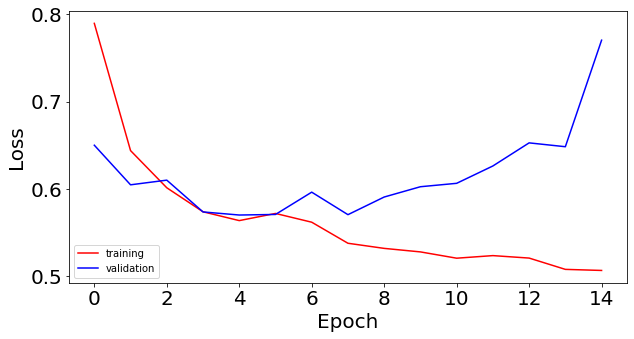

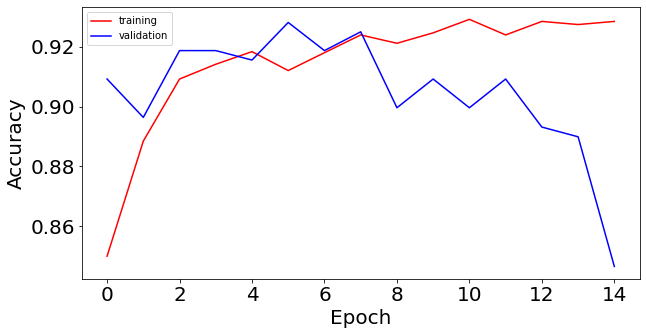

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='training')
ax.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='validation')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(np.sqrt(lr_model_history.history['accuracy']), 'r', label='training')
ax.plot(np.sqrt(lr_model_history.history['val_accuracy']), 'b' ,label='validation')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [57]:
#import SimpleITK as sitk
#import os
#import glob
#reader = sitk.ImageFileReader()
#test_image_path = '/Users/keshavaprasad/Desktop/image/Classification_model/Data/Test/*'

In [40]:
img_size = 50 # fix the size of the image
Path = "Data/Test"
Testing_image = []# list of testing images
image_name = []# list of image names
try:
    for img in os.listdir(Path): #gives the images from the path
        img_array = cv2.imread(os.path.join(Path,img),cv2.IMREAD_GRAYSCALE) # read every image in gray scale from the given path
        Testing_image.append(img_array)
        image_name.append(img)
        #plt.imshow(img_array,cmap='gray')
        #plt.show()
        #break
except Exception as e:
    pass

In [41]:
#print(Testing_image[8])
#print(image_name[8])

if image_name[8]== '.DS_Store':
    print(Testing_image.pop(8))
    print(image_name.pop(8))

None
.DS_Store


In [42]:
print(len(Testing_image))
print(Testing_image[8].shape)
print(len(image_name))
image_name

60
(50, 50)
60


['13.tif',
 '5569.tif',
 '12.tif',
 '1320.tif',
 '10.tif',
 '4661.tif',
 '11.tif',
 '15.tif',
 '2228.tif',
 '4658.tif',
 '14.tif',
 '16.tif',
 '3450.tif',
 '17.tif',
 '5442.tif',
 '1618.tif',
 '3147.tif',
 '1779.tif',
 '1627.tif',
 '5131.tif',
 '9.tif',
 '1784.tif',
 '3151.tif',
 '8.tif',
 '4951.tif',
 '4809.tif',
 '1781.tif',
 '2076.tif',
 '4822.tif',
 '6205.tif',
 '3.tif',
 '2245.tif',
 '4350.tif',
 '2.tif',
 '0.tif',
 '1772.tif',
 '2535.tif',
 '4353.tif',
 '1.tif',
 '3000.tif',
 '5.tif',
 '3606.tif',
 '4.tif',
 '4975.tif',
 '6.tif',
 '2081.tif',
 '7.tif',
 '4520.tif',
 '3139.tif',
 '2227.tif',
 '2226.tif',
 '2391.tif',
 '1315.tif',
 '19.tif',
 '2998.tif',
 '1936.tif',
 '2230.tif',
 '18.tif',
 '2395.tif',
 '5410.tif']

In [43]:
Test_image = np.array(Testing_image).reshape(-1,img_size,img_size,1)#make an array of every element of list from Testing_image and then reshape them
#Test_image = Test_image/255.0

In [44]:
#print(Test_image[8].shape)
#print(Test_image[8])

In [45]:
scores = model.predict_classes(Test_image)
scores

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2])

In [46]:
for i in range(len(Test_image)):
    print("Image:",image_name[i],"with score:",scores[i])    

Image: 13.tif with score: 2
Image: 5569.tif with score: 2
Image: 12.tif with score: 2
Image: 1320.tif with score: 2
Image: 10.tif with score: 2
Image: 4661.tif with score: 2
Image: 11.tif with score: 2
Image: 15.tif with score: 2
Image: 2228.tif with score: 2
Image: 4658.tif with score: 1
Image: 14.tif with score: 2
Image: 16.tif with score: 2
Image: 3450.tif with score: 2
Image: 17.tif with score: 2
Image: 5442.tif with score: 2
Image: 1618.tif with score: 2
Image: 3147.tif with score: 2
Image: 1779.tif with score: 2
Image: 1627.tif with score: 2
Image: 5131.tif with score: 2
Image: 9.tif with score: 2
Image: 1784.tif with score: 2
Image: 3151.tif with score: 2
Image: 8.tif with score: 2
Image: 4951.tif with score: 2
Image: 4809.tif with score: 2
Image: 1781.tif with score: 2
Image: 2076.tif with score: 2
Image: 4822.tif with score: 2
Image: 6205.tif with score: 2
Image: 3.tif with score: 2
Image: 2245.tif with score: 2
Image: 4350.tif with score: 0
Image: 2.tif with score: 2
Image: 0

In [47]:
# saving the single neuron tiles into a particular for now - as a adhoc fix!
import os
import cv2
dest_path = '/Users/keshavaprasad/Desktop/image/Classification_model/singleneurontiles'
directory = '/Users/keshavaprasad/Desktop/image/Classification_model/'
#print(os.chdir(dest_path)) 
#print(os.chdir(directory))  
#print(os.getcwd())

for i in range(len(Test_image)):
    if scores[i]==1:
        print("Image:",image_name[i])
        #print("TestImage:",Test_image[i])
        cv2.imwrite(image_name[i], Test_image[i])
        #pass

Image: 4658.tif
Image: 2226.tif
Image: 2395.tif


In [12]:
#need the images of class1 to be appended in a separate list
sn_list  = [] # contains list of filenames of single neurons
sn_images = [] # conatins tiles of single neurons #(actual images itself)
for i in range(len(Test_image)):
    if scores[i]==1:
        #print(Test_image[i])
        #print("Image ",image_name[i])
        sn_images.append(Test_image[i])
        sn_list.append(image_name[i])

In [13]:
partial_list = []
partial_images = []
for i in range(len(Test_image)):
    if scores[i]==2:
        #print(Test_image[i])
        #print("Image ",image_name[i])
        partial_images.append(Test_image[i])
        partial_list.append(image_name[i])
    
#partial_list  

In [15]:
print(len(sn_list))

18


In [ ]:
'''# Display these single neurons
import matplotlib.pyplot as plt
plt.imshow(b[16],cmap='gray')
plt.show()
'''

In [16]:
sn_list

['13.tif',
 '4661.tif',
 '15.tif',
 '4658.tif',
 '5442.tif',
 '1618.tif',
 '5131.tif',
 '1784.tif',
 '4951.tif',
 '2076.tif',
 '4350.tif',
 '3000.tif',
 '3606.tif',
 '4520.tif',
 '2226.tif',
 '1315.tif',
 '19.tif',
 '2395.tif']

In [32]:
'''scores = []
for file in glob.glob(test_image_path):
    reader.SetFileName(file)
    a = reader.Execute()
    b = sitk.GetArrayFromImage(a)
    #b.shape
    scores.append(model.predict_classes(b[:,:,0].reshape(1,50,50,1)))
    #print(file,"scores:",scores)
'''

In [52]:
#Test_D, img_names = Test_Data()
# Test_D is the image itself while img_names is a variable containing list of names of images
#print(img_names)
#print("*************")
#print(Test_D)
#scores = model.predict_classes(Test_D)
#print(Test_D.shape)
#for i in range(len(Test_D)):
#     print("Image:",img_names[i],"with score:",scores[i])

In [55]:
#print(img_names)
#os.listdir()

In [42]:
#print(type(scores)) # scores is numpy.ndarray. so need to convert it into a list to access list methods!
#scores_list = scores.tolist()

In [49]:
'''single_indexes = []
partial_indexes = []

partial_neuron_list = []

for i in scores_list:
    if i ==1:
        single = scores_list.index(i)
        single_indexes.append(single)
for l in scores_list:
    if l ==2:
        partial = scores_list.index(l)
        partial_indexes.append(partial)
for j in indexes:
    partial_neuron_list.append(Test_D[j])
for k in indexes:
    single_neuron_list.append(Test_D[k])
  '''  

'single_indexes = []\npartial_indexes = []\n\npartial_neuron_list = []\n\nfor i in scores_list:\n    if i ==1:\n        single = scores_list.index(i)\n        single_indexes.append(single)\nfor l in scores_list:\n    if l ==2:\n        partial = scores_list.index(l)\n        partial_indexes.append(partial)\nfor j in indexes:\n    partial_neuron_list.append(Test_D[j])\nfor k in indexes:\n    single_neuron_list.append(Test_D[k])\n  '

In [27]:
#model.save('Model_That_Worked_for_three_classes.h5')

In [28]:
#from keras.models import load_model
#worked_model = load_model('Model_That_Worked_for_three_classes.h5')

In [81]:
#os.path.exists('/Users/keshavaprasad/Desktop/image/Classification_model/Data/Test/2076.tif')

True

In [61]:
#b[:,:,0].shape

(50, 50)

In [56]:
#a.GetDimension()

2

In [103]:
#img_size = 50
#Test = np.array(b).reshape(-1,img_size,img_size,1)
#C = Test/255.0
#print(b.shape)

In [120]:
#b[:,:,0].reshape(1,50,50,1)

array([[[[15],
         [15],
         [15],
         ...,
         [30],
         [50],
         [60]],

        [[35],
         [45],
         [45],
         ...,
         [15],
         [30],
         [55]],

        [[45],
         [60],
         [30],
         ...,
         [20],
         [ 5],
         [45]],

        ...,

        [[20],
         [20],
         [15],
         ...,
         [40],
         [70],
         [61]],

        [[40],
         [ 0],
         [10],
         ...,
         [20],
         [55],
         [65]],

        [[30],
         [25],
         [40],
         ...,
         [40],
         [40],
         [40]]]], dtype=uint8)